# 動画の解析をやってみよう！

動画はOpenCVというライブラリを用いて、読み込みや書き込み、データ分析などができます。  
大量の野外画像を取得してきて、その解析などを行ったりなど、様々なことが実施できます。
（ちなみに、PILは画像解析が行えるライブラリとして有名です。）  

研修用に以下のような合成画像で作成した動画を準備しました。  
固定カメラを仕掛けておいて、変化があったかどうかを自動で検出してその箇所だけ人が確認するような利用を想定して、以降のコーディングを行っていこうと思います。  

![alt text](_movie/a.gif "サンプル動画")

今回、解析用に準備したのは、「a.mp4」「ap.mp4」「p.mp4」「pp.mp4」の四つです。  
（「a.gif」はこのノートブック貼り付け用なので、無視してください。）

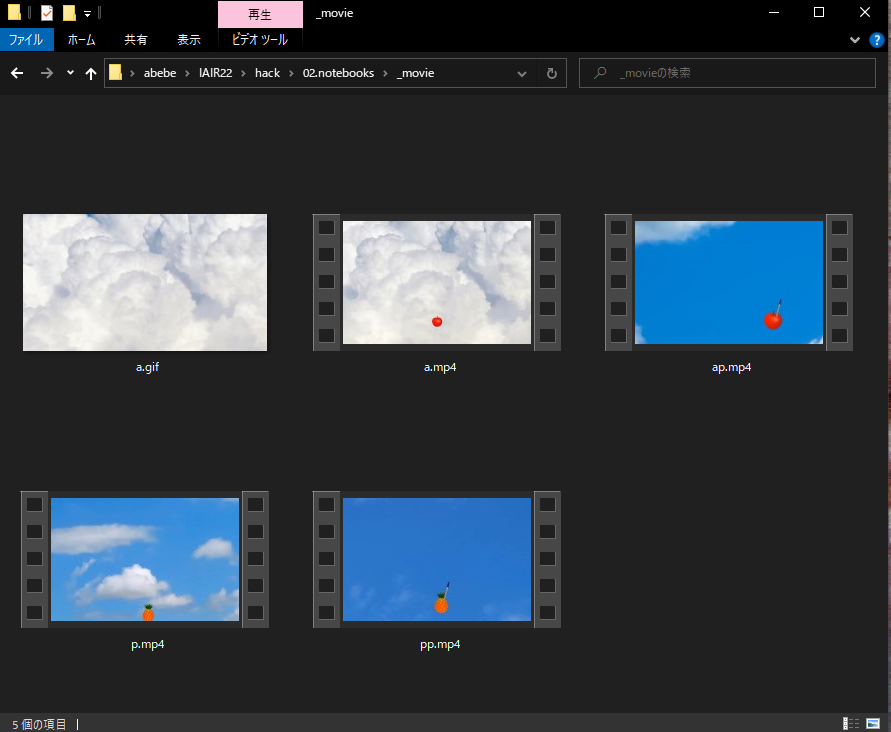

# OpenCVで動画からフレームを取り出してみよう！

ビデオは以下のスクリプトで1枚ずつフレームを取り出してみることができます。  
フレームとはいったいどんなデータとして取り出させるのでしょうか。Pythonという言語を介してPCと対話しながら探ってみましょう。  
わからないことはPCと直接お話していけば、お話していくうちになんとなくどういったものか把握できてくるものです。  

    cap = cv2.VideoCapture("動画ファイルのパス")
    ret, frame = cap.read()

PCにお話ししてもらうには、「print()」です。  
とにかく探索的にいろいろ話してもらいましょう！例えば以下のような感じ。

In [13]:
import cv2

cap = cv2.VideoCapture("_movie/a.mp4")
print("cap:", type(cap), cap) #<class 'cv2.VideoCapture'>... なるほど、capはなんだかよくわかりませんね！

ret, frame = cap.read()
print("ret:", type(frame), type(ret), ret)
#print("frame:", frame) #めちゃたくさん数字が出てくる…
print("frame:", type(frame), frame.shape)

cap: <class 'cv2.VideoCapture'> <VideoCapture 00000261D5529BD0>
ret: <class 'numpy.ndarray'> <class 'bool'> True
frame: <class 'numpy.ndarray'> (720, 1280, 3)


ちなみに、「cap（cv2.VideoCaptureクラスのインスタンス）」はいろんな基本情報をとりだすことができます。  
以下の例の他にも総フレーム数やスタートのフレーム番号をセットするなど、いろんな内容を調べたり再設定したりできるので、知っておくと便利かもしれません。  
今回用意しているmp4動画もcv2を使ってPythonスクリプトで作成している動画になります。

In [14]:
print("この動画のFPSは", cap.get(cv2.CAP_PROP_FPS),"です。")
print("この動画の横幅は", cap.get(cv2.CAP_PROP_FRAME_WIDTH),"ピクセルです。")
print("この動画の縦幅は", cap.get(cv2.CAP_PROP_FRAME_HEIGHT),"ピクセルです。")

この動画のFPSは 30.0 です。
この動画の横幅は 1280.0 ピクセルです。
この動画の縦幅は 720.0 ピクセルです。


# フレームって何者？？

動画から切り出されたフレームは一体どんなデータなのかについても、PCと対話しながら調べてみましょう。  
例えば、上の例では「720, 1280, 3」という形のNumpy配列でした。Numpy配列という言葉は、「02.大量のデータのグラフ描画を指示されました編.ipynb」でも出てきた数値などのデータの集合体でしたね。  

画像（フレーム）というのも、実は数値の集合体だったんだなということがわかると思います。  

どんな数値が入っているのか気になるので、例えば以下のようにPCとお話してみました。  

In [20]:
print(type(frame[0,0,0]),"\n")
print(frame[0:5,0:5,0],"\n")
print(frame[0:5,0:5,0],"\n")
print(frame[0:5,0:5,0],"\n")
import numpy as np
print("min:", np.min(frame))
print("max:", np.max(frame))

<class 'numpy.uint8'> 

[[189 191 196 201 202]
 [190 194 197 202 204]
 [194 196 201 205 208]
 [198 201 205 210 211]
 [201 203 208 213 214]] 

[[189 191 196 201 202]
 [190 194 197 202 204]
 [194 196 201 205 208]
 [198 201 205 210 211]
 [201 203 208 213 214]] 

[[189 191 196 201 202]
 [190 194 197 202 204]
 [194 196 201 205 208]
 [198 201 205 210 211]
 [201 203 208 213 214]] 

min: 44
max: 255


数値そのものは「UINT8」という型ですが、これはググってみると「8ビット符号なし整数」といった謎の説明が出てくると思います。  
PCはビット（0か1か）でいろんな情報を表現しますが、8ビットはその名の通りビットが8個ある状態です（2進数）。なので値としては2の8乗（256）の組合せがあることになり、0からスタートすると0～255の範囲です。このフレームも最大は255になっていますね。  

720は縦のピクセル数、1280は横のピクセル数として、3が何かというと、RGBの3（※OpenCVの場合はBGRで逆向き）です。  
画像の多くは色を赤（Red）、緑（Green）、青（Blue）の光の三原色で表現します。0～255の数値のうち、値が大きいほどそれぞれの色成分が強いということになります。ちなみに全て0なら黒色、全て255なら白色です。  
720×1280のそれぞれの場所のうち、赤・緑・青の強度を0～255の範囲で表現しているわけで、その数値をもとにカラフルな画像として表示されているわけです。  

光の三原色は以下のような感じです。

In [24]:
from IPython.display import HTML
HTML(r'<iframe width="960" height="640" src="https://iro-color.com/episode/three-primary-colors.html" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

# 変化のある時間帯を調べてみよう！

動画のフレームも所詮は数値であることがわかりました。  
動画の中に動きがあるかどうかは、例えばフレーム間の引き算を行うことなどで簡単に検知することができます。（実務レベルでは単なる引き算ではなく、ちょっとずつ背景画像を更新してその差をとる「背景差分法」が用いられます。）  

フレーム間の差を計算するスクリプトを作ってみましょう。例えば以下のような感じになりますでしょうか。

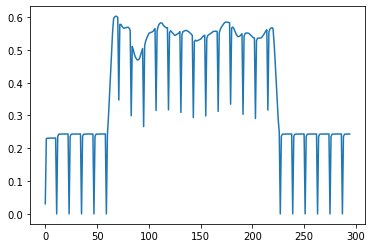

In [41]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Agg')

def sabun(path):
    cap = cv2.VideoCapture(path)

    # まずは最初の画像を取得しておきます。この画像との差分の大きさを集計します。
    ret, old_frame = cap.read()
    old_frame = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY) # 白黒画像に変換
    old_frame = old_frame.astype(np.float32)                # 単精度の実数に型変換

    # 集計スタート
    score = []
    while True: # 無限ループです。
        ret, new_frame = cap.read()
        if not ret: break # retがFalseになると読み込みが終わっている合図なのでbreakでループ脱出

        new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
        new_frame = new_frame.astype(np.float32)

        score.append( np.mean(np.abs(new_frame-old_frame)) ) # 差分の平均スコアの計算です。
        #old_frame = new_frame
        #print(score[-1])
    cap.release() # 動画を解放します。
    return np.array(score) # スコアの配列を返します。

# 実行！
score = sabun("_movie/a.mp4")
plt.plot(score)
plt.show()

なるほど、50フレーム以降から200フレームすぎくらいまで、動いているものが出現していそうです。

In [44]:
# せっかくなので、差分の動画も保存してみました。
# 「_movie/a_sabun.mp4」という白黒動画が出現してきていると思います。

def sabun_with_out(path):
    cap = cv2.VideoCapture(path)

    fps = int(cap.get(cv2.CAP_PROP_FPS))                      ###
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))                ###
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))               ###
    fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')       ### おまじないです。
    opath = path.replace('.mp4','_sabun.mp4')                 ###
    out = cv2.VideoWriter(opath, fourcc, fps, (w, h), False) ###

    ret, old_frame = cap.read()
    old_frame = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    old_frame = old_frame.astype(np.float32)

    score = []
    while True:
        ret, new_frame = cap.read()
        if not ret: break

        new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
        new_frame = new_frame.astype(np.float32)
        sab_frame = np.abs(new_frame-old_frame)
        out.write(sab_frame.astype(np.uint8)) ###

        score.append( np.mean(sab_frame) )
        #old_frame = new_frame
    cap.release()
    out.release() ###
    return np.array(score)

score = sabun_with_out("_movie/a.mp4")
#plt.plot(score)
#plt.show()

# 練習問題

 - 練習問題11-1 ほかの動画でも同様の解析を実施してみてください。
 - 練習問題11-2 物体が出現しているところだけの要約動画を作成して保存してみてください。
 - 練習問題11-3 動いているものの大きさを計測してみてください。（画像解析）
 - 練習問題11-4 背景差分法を検索しながら実装してみてください。
 - 練習問題11-5 OpenCVにある物体追跡（例：Optical Flow）の機能で動いているものの軌道情報をグラフ化してください。
 - 練習問題11-6 Webカメラがある方のみ：自身のWebカメラで顔の検出を行ってみてください（OpenCVのHaar-like）。